In [86]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [87]:
from scipy.special import softmax
from modules import FaceDetector
from modules.utils import CropImage

In [88]:
face_detector = FaceDetector()
crop_image = CropImage()

I0000 00:00:1709219627.285946  706743 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1709219627.301244  706743 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


In [89]:
model = tf.keras.models.load_model('models/untispoofing')

In [90]:
image = cv2.imread('images/image.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [91]:
data = face_detector.detecFace(image)

/Users/javohirjalilov/github/cvProject/ProjectsPR/Face/face-untispoofing-detection/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [92]:
x1, y1, x2, y2 = data

In [93]:
im1 = cv2.rectangle(image.copy(), (x1, y1), (x2, y2), (255, 0, 0), 2)

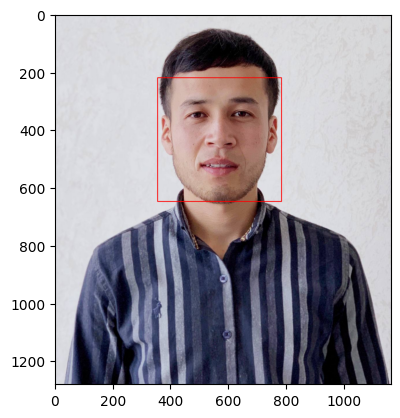

In [94]:
plt.imshow(im1)
plt.show()

In [95]:
crop = crop_image.crop(image, (x1, y1, x2 - x1, y2 - y1))

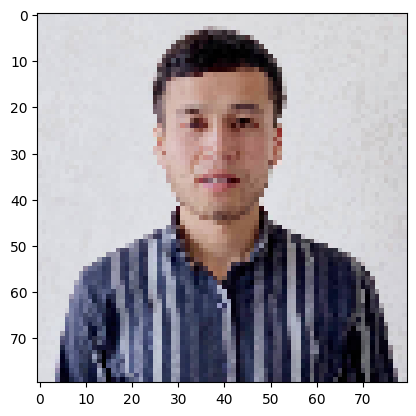

In [96]:
plt.imshow(crop)
plt.show()

In [97]:
model = tf.keras.models.load_model("models/untispoofing")

In [98]:
dim_img = np.expand_dims(crop, axis=0)

In [99]:
pred = model(dim_img)

In [100]:
softmax_data = softmax(pred.numpy())

In [101]:
for i in softmax_data[0]:
    print(f"{i:.5f}")

0.11318
0.76781
0.11901


In [102]:
label = softmax_data.argmax()

In [103]:
label

1

In [104]:
converter = tf.lite.TFLiteConverter.from_saved_model('models/untispoofing') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

2024-02-29 20:14:11.799280: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-02-29 20:14:11.799311: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 135, Total Ops 252, % non-converted = 53.57 %
 * 135 ARITH ops

- arith.constant:  135 occurrences  (f32: 134, i32: 1)



  (f32: 12)
  (f32: 49)
  (f32: 2)

  (f32: 17)
  (f32: 33)


In [105]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")

In [106]:
interpreter.allocate_tensors()

In [107]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [108]:
print("INPUT SHAPE: {}  OUTPUT SHAPLE: {}".format(input_details[0]['shape'], output_details[0]['shape']))

INPUT SHAPE: [ 1 80 80  3]  OUTPUT SHAPLE: [1 3]


In [109]:
intput_tensor = (dim_img).astype(np.float32)

In [110]:
interpreter.set_tensor(input_details[0]['index'], intput_tensor)

In [111]:
interpreter.invoke()

In [112]:
output = interpreter.get_tensor(output_details[0]['index'])

In [113]:
x = softmax(output)

In [114]:
x.argmax()

1